# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/macuser/miniconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


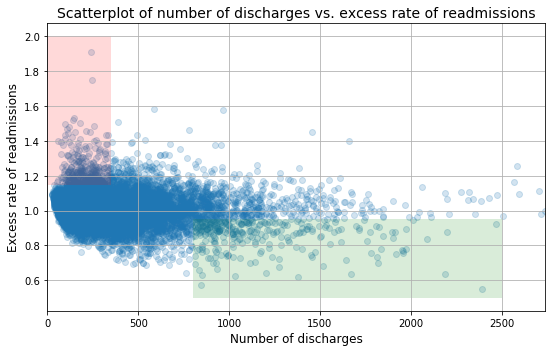

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Part A: Do you agree with the above analysis and recommendations? Why or why not?

Answer: Some parts of the analysis, I agree with; others, I do not. I will address them all below (my assessment in brackets and bold:

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges **[Disagree - visually, the data points seem to be centered on 1.0 rate of readmissions for all numbers of discharges. This suggests close to zero correlation between the two variables.]**
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) **[Agree]**
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) **[Disagree - there are plenty of data points on the lower end of number of discharges that also have lower rates of readmissions.]

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 **[Will confirm]**
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 **[Will confirm]**

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. **[Disagree - the correlation is weak, at best, across all sizes of hospital.]
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. **[Agree - this appears reasonable based on visual inspection]**

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. **[Agree]**
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. **[Disagree - As pointed out above, smaller hospitals do not NECESSARILY have higher rates of readmission - many of them do not.]**

B1: Setup an appropriate hypothesis test.

Null hypothesis: There is no significant difference between excess readmission rate for smaller hospitals (# discharges < 100) and excess readmission rate for larger hospitals (# discharges > 1000).

Alternative hypothesis: There IS a significant difference between excess readmission rates for smaller and larger hospitals.

In [29]:
#B2 & B3: Compute and report the observed significance value (or p-value). Report statistical significance for
#α = .01.

#print(clean_hospital_read_df.columns)
stripped_df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
print(stripped_df.head())
stripped_df = stripped_df[stripped_df['Number of Discharges'] != 0] #Remove hospitals with 0 discharges
print(stripped_df.head())
print(stripped_df.tail())

       Number of Discharges  Excess Readmission Ratio
16857                     0                       NaN
14582                     0                       NaN
15606                     0                       NaN
15615                     0                       NaN
14551                     0                       NaN
      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934
1853                    29                    1.0908
1290                    30                    1.1123
       Number of Discharges  Excess Readmission Ratio
8126                   2716                    0.9804
6643                   2740                    1.0003
1892                   3570                    1.0896
13615                  3980                    0.7682
13666                  6793                    0.7379


In [13]:
df_small = stripped_df[stripped_df['Number of Discharges'] < 100]
df_large = stripped_df[stripped_df['Number of Discharges'] > 1000]

print(df_small.head())
print(df_large.head())

      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934
1853                    29                    1.0908
1290                    30                    1.1123
       Number of Discharges  Excess Readmission Ratio
11757                  1002                    0.9192
821                    1004                    1.1405
2363                   1007                    1.0760
7188                   1007                    0.9930
2341                   1008                    1.0765


In [28]:
small_rr = df_small['Excess Readmission Ratio'].values
large_rr = df_large['Excess Readmission Ratio'].values

n_small = len(small_rr)
small_mean = np.mean(small_rr)
small_std = np.std(small_rr)
small_gt_one = len(small_rr[small_rr > 1.0]) / float(n_small)

n_large = len(large_rr)
large_mean = np.mean(large_rr)
large_std = np.std(large_rr)
large_gt_one = len(large_rr[large_rr > 1.0]) / float(n_large)

print(n_small, small_mean, small_gt_one) #Mean of 1.022, 63% above 1.0 RR
print(n_large, large_mean, large_gt_one) #Mean of 0.978, 44% above 1.0 RR

(1188, 1.0226183501683501, 0.6321548821548821)
(463, 0.9783354211663067, 0.4449244060475162)


In [27]:
t = (small_mean - large_mean) / np.sqrt(((small_std ** 2) / float(n_small)) + ((large_std ** 2) / float(n_large)))
print(t) #t-value = 7.61 => p-value ~ 0 => 0 < 0.1 (alpha) => NULL HYPOTHESIS REJECTED!

7.6095459123357525


**Part B4: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

Answer: No, there is both a statistically significant difference in the excess readmission rates (ERR) for each hospital category, and a "considerably" larger number of hospitals above 1.0 ERR in the small hospital category (based on visual inspection of scatter plot and calculated variable, small_gt_one). My recommendations, targeting these problematic smaller hospitals, remains the same.

**Q5: Look at the scatterplot above.

+ **What are the advantages and disadvantages of using this plot to convey information?
+ **Construct another plot that conveys the same information in a more direct manner.

Answer:

Advantages:
+ Allows for quick visual estimation of relationship between variables and correlation (if any)
+ Allows for quick recognition of presence of outliers

Disadvantages:
+ Data points overlap visually, making it difficult to get a sense of sample size and pick out individual points
+ Red and green shaded areas don't allow viewer to compare high/low excess readmission rates at both ends of the x-axis

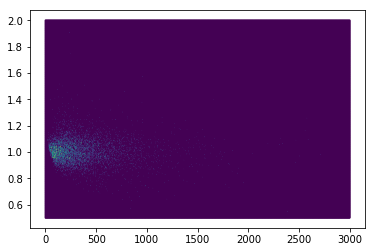

In [46]:
_ = plt.hexbin('Number of Discharges', 'Excess Readmission Ratio', data=stripped_df, gridsize=500, extent=(0, 3000, 0.5, 2.0))
plt.show()

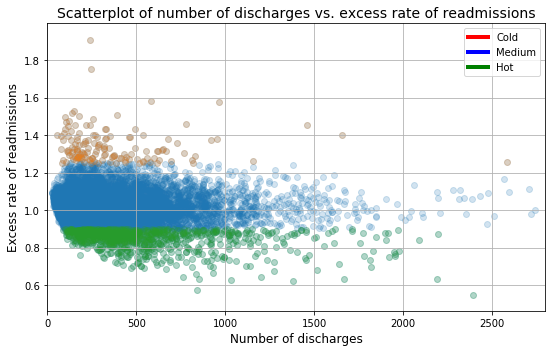

In [61]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = stripped_df['Number of Discharges'].values
y = stripped_df['Excess Readmission Ratio'].values

high_err_df = stripped_df[stripped_df['Excess Readmission Ratio'] > 1.25]
low_err_df = stripped_df[stripped_df['Excess Readmission Ratio'] < 0.9]

x2 = high_err_df['Number of Discharges'].values
y2 = high_err_df['Excess Readmission Ratio'].values

x3 = low_err_df['Number of Discharges'].values
y3 = low_err_df['Excess Readmission Ratio'].values

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.2)
ax.scatter(x2, y2, alpha=0.2)
ax.scatter(x3, y3, alpha=0.2)

custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='g', lw=4)]

ax.legend(custom_lines, ['ERR > 1.25', 'ERR', 'ERR < 0.9'])

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 2800])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()